**Anton Paar**

| Value | Index |
| :------- | :----:|
| Point No | 0 |
| Time (s) | 1 |
| Extensional Stress (MPa) | 2 |
| Force (mN) | 3 |
| Extensional Strain (1) | 4 |
| Gap (mm) | 5 |
| Elastic Modulus (MPa) | 6 |
| Displacement (μm) | 7 |
| Extensional Strain Rate (1/s) | 8 |

**Rules**
- Order must be obeyed, especially the elastic modulus column number! (But additional variables can be added)
- Don't touch Anton Paar export
- Export all the tests together
- (Not used) points coming from Anton Paar are discarded all together
- Keyword argument discard_negative_modulus deactivates the points with negative elastic modulus (Anton Paar application does the same) and plottable methods cannot activate them
- At first all points (that are not 'not used') are 'On' for plotting and can be switched 'Off'

In [2]:
import main

antonpaar_data = main.Dataset(path='.\AllTests2.csv', delimiter='\t', encode='utf16', newline='', discard_negative_modulus=True)
antonpaar_data.ProcedureAntonPaar()

**Examples**

(<Figure size 1920x1080 with 1 Axes>,
 <Axes: title={'center': 'Test 47'}, xlabel='Time [s]', ylabel='Extensional Strain [1]'>)

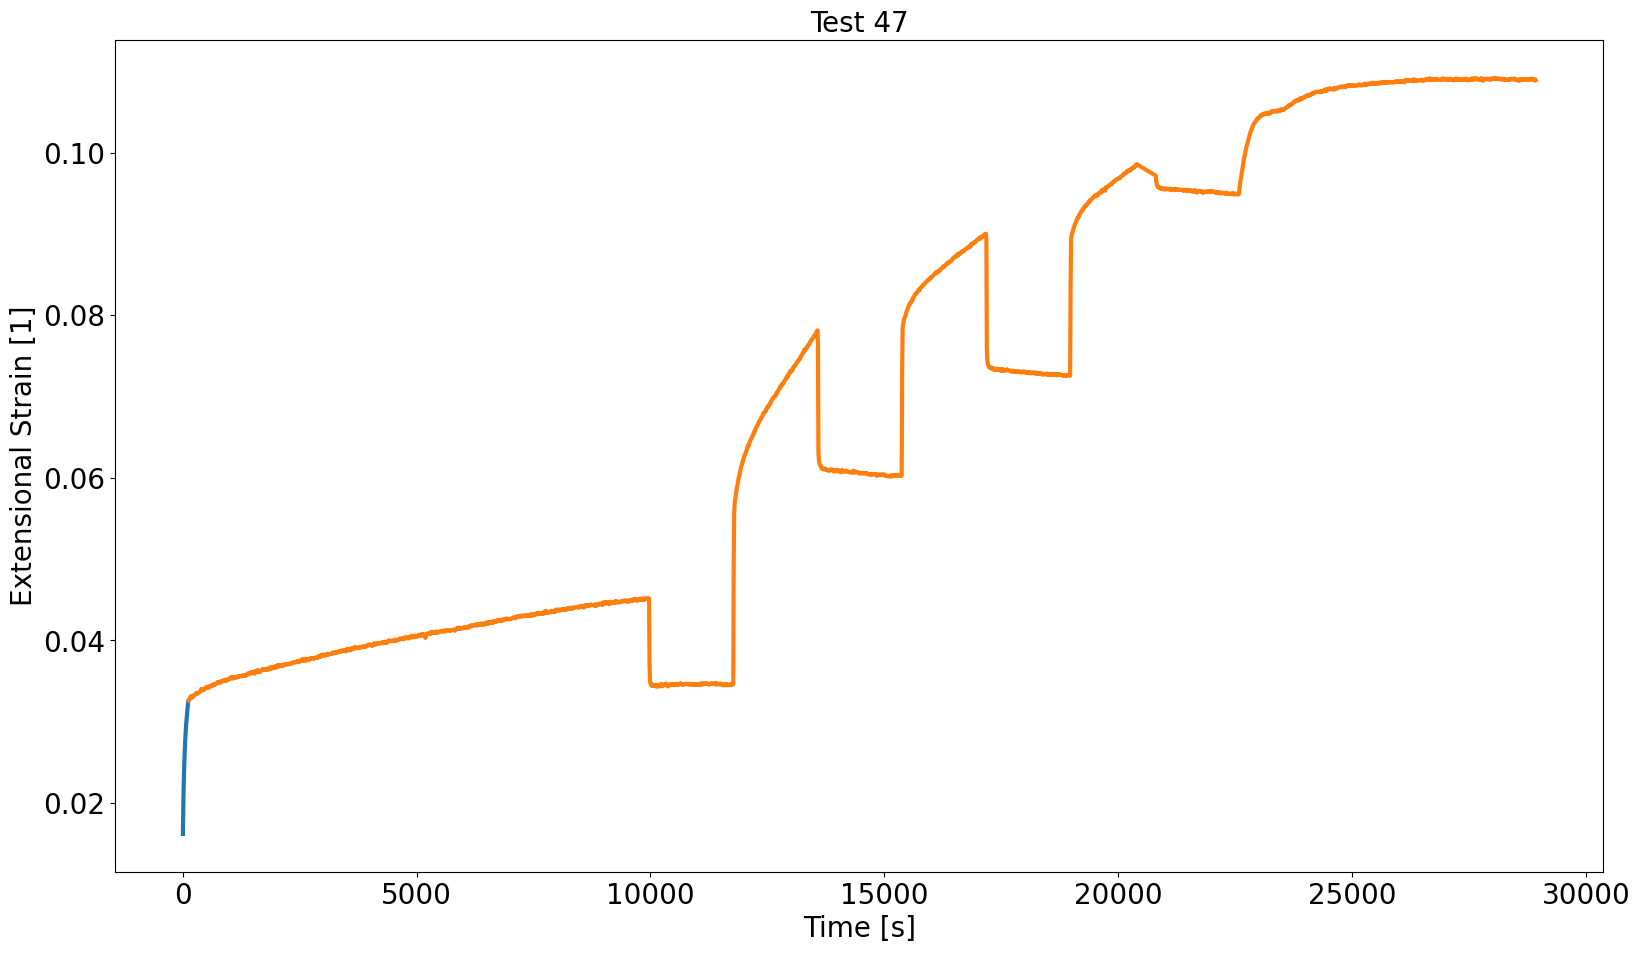

In [18]:
# # Plot test quick
# # Printing only last result, without interval list it deactivates all the intervals belonging to that result
# # Fast Plot automatically prints logartihmic graph for Elastic Modulus
test47 = antonpaar_data.CallTestbyName('Test 47')
test47.SetPlottable('Off', result_list=[0,1,2,3])
test47.SetPlottable('On', result_list=[3])
test47.FastPlot('Time', 'Extensional Strain')

(<Figure size 1920x1080 with 1 Axes>,
 <Axes: title={'center': 'Test 27'}, xlabel='Time [s]', ylabel='Extensional Strain [1]'>)

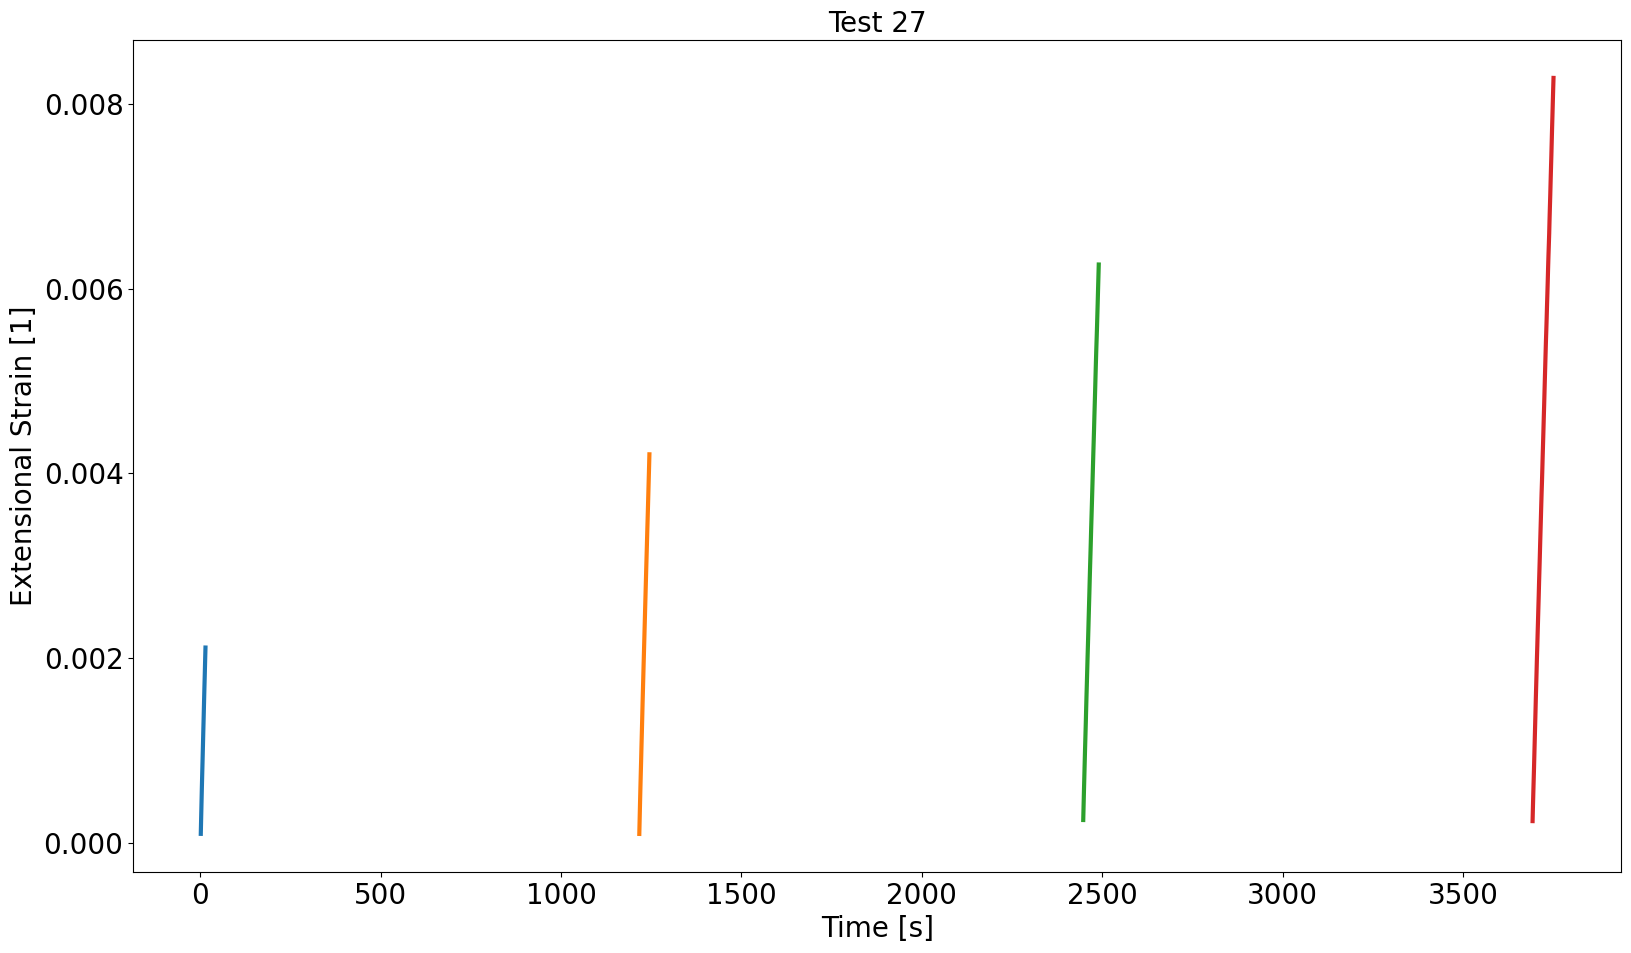

In [19]:
# # You can also activate and deactivate intervals
test27 = antonpaar_data.CallTestbyName('Test 27')
test27.SetPlottable('Off', result_list=[0,1,2])
test27.SetPlottable('On', result_list=[2], interval_list=[0,2,4,6])
test27.FastPlot('Time', 'Extensional Strain')

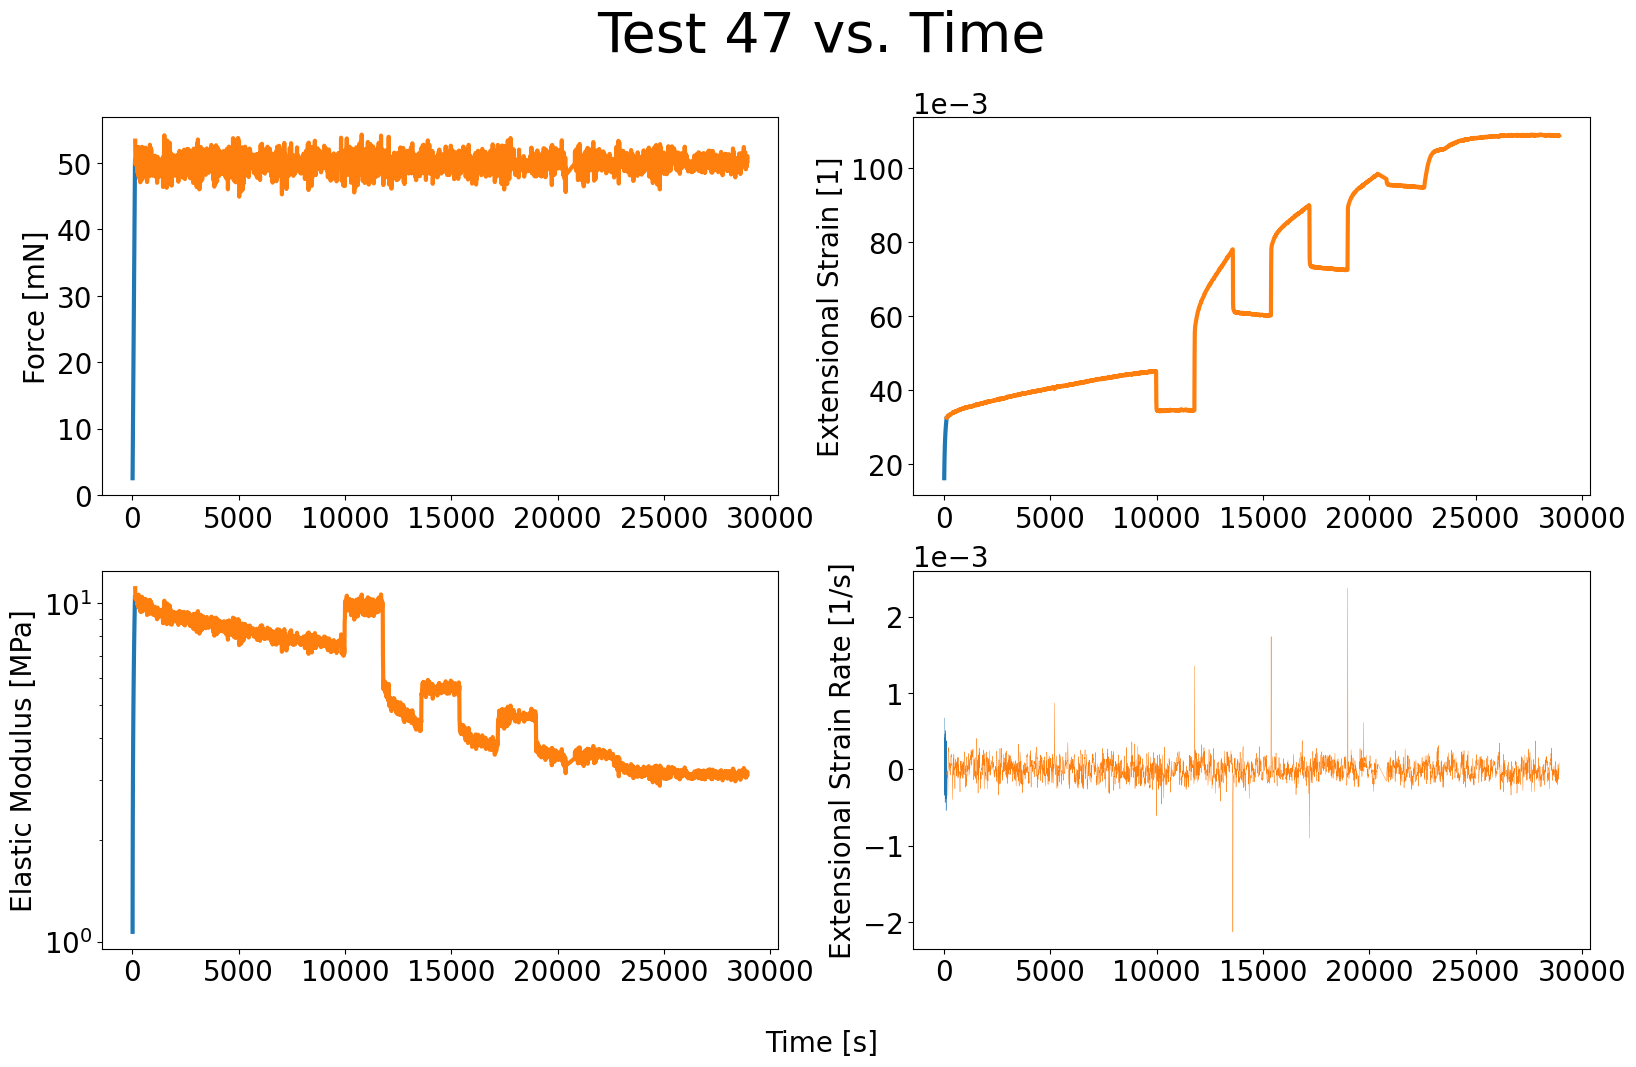

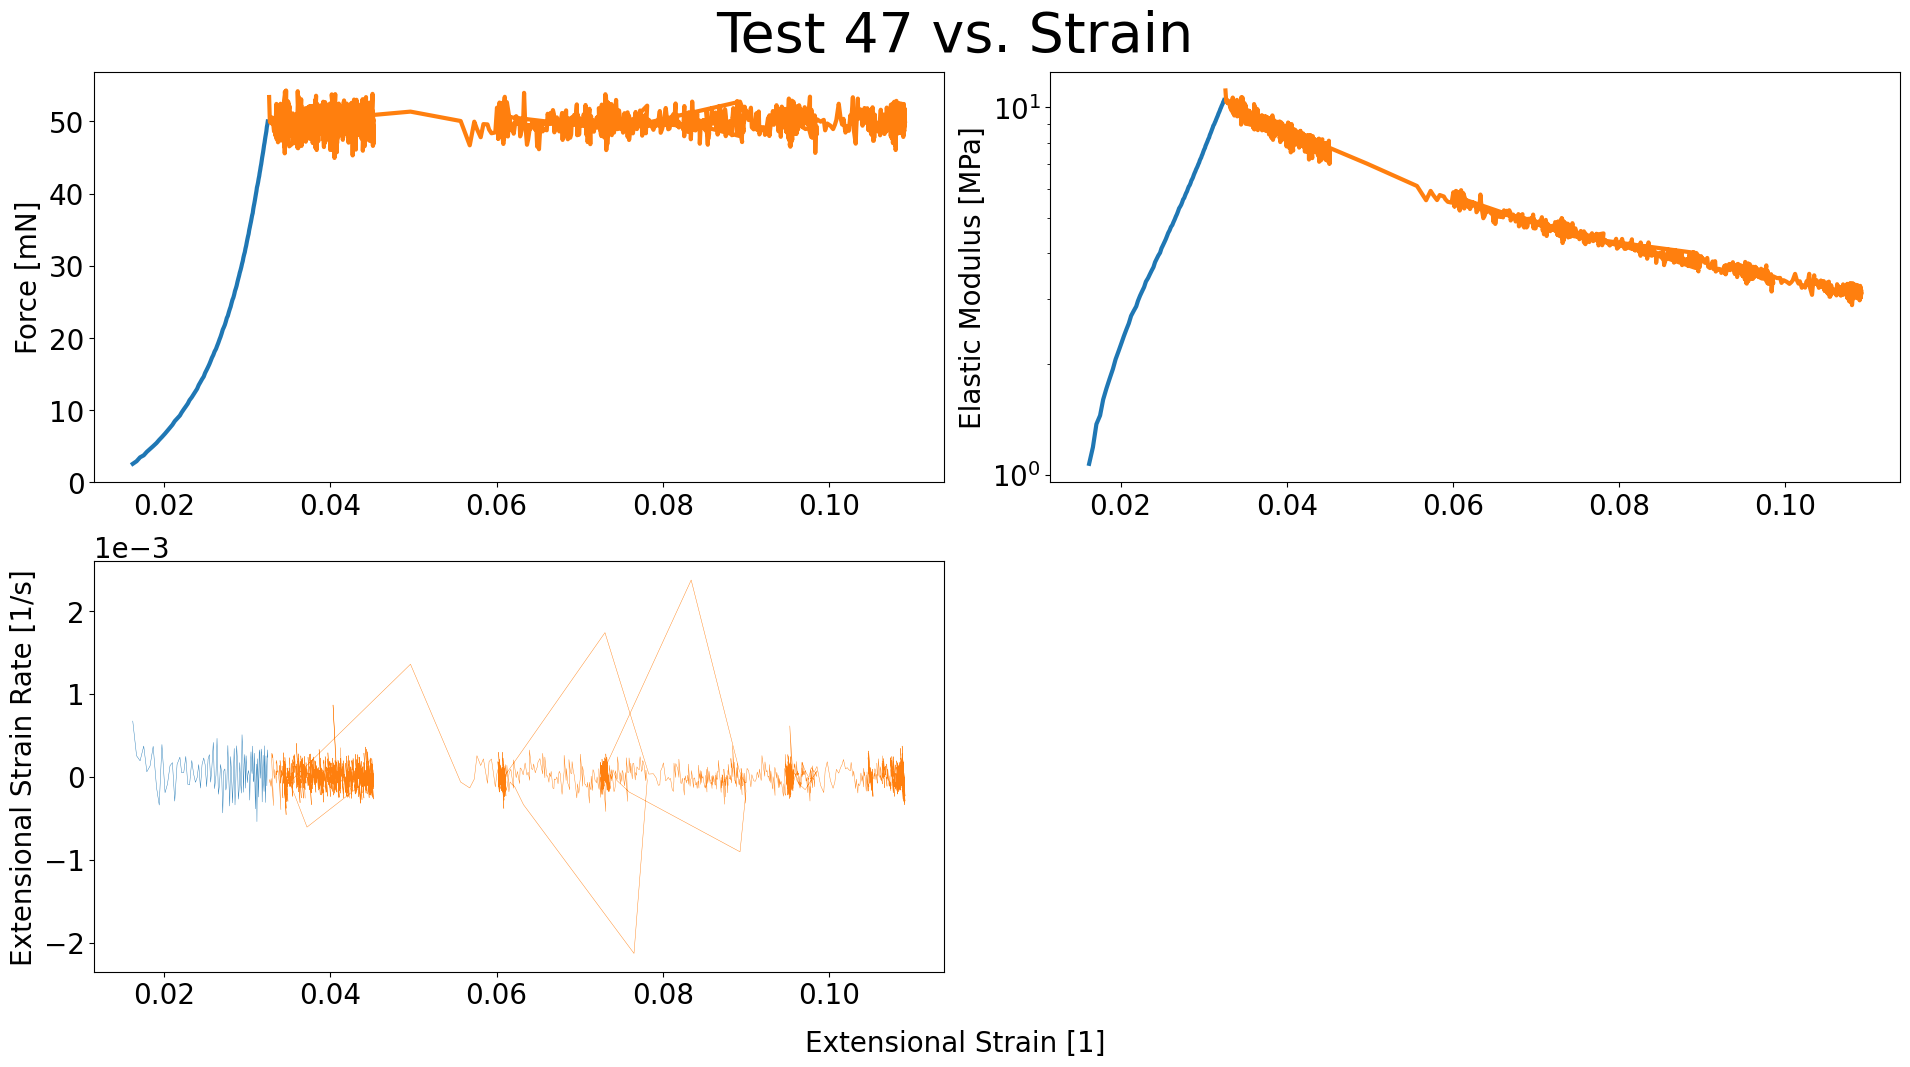

In [20]:
# # Plot all charts for that test
antonpaar_data.CallTestbyName('Test 47').PlotAll()

In [22]:
# # Get entire list for a variable for a particular test
force_val_33 = antonpaar_data.CallTestbyName('Test 33').GetVal('Force')
# Force for Test 33, first result, third interval
print(force_val_33[0][2])

[-15.96, -14.19, -12.92, -12.2, -12.1, -11.82, -11.3, -11.18, -11.27, -11.03, -10.66, -10.56, -10.58, -10.38, -10.09, -10.26, -10.28, -9.74, -9.9, -9.91, -9.86, -9.5, -9.91, -9.63, -9.43, -9.42, -9.41, -9.14, -9.2, -9.39, -9.12, -8.99, -9.24, -9.18, -8.8, -8.57, -8.78, -8.82, -8.46, -8.33, -8.55, -8.52, -8.23, -8.35, -8.32, -7.95, -7.87, -8.17, -8.04, -7.87, -8.16, -8.23, -8.01, -7.66, -7.98, -7.86, -7.7, -7.78, -7.94, -7.58, -7.45, -7.82, -7.6, -7.31, -7.64, -7.44, -7.11, -7.28, -7.39, -6.95, -7.21, -7.28, -6.9, -6.91, -7.21, -6.8, -6.91, -7.07, -7.03, -6.55, -6.65, -6.85, -6.46, -6.54, -6.73, -6.52, -6.25, -6.63, -6.65, -6.32, -6.28, -6.35, -6.43, -6.07, -6.15, -6.31, -6.15, -5.8, -5.99, -6.07, -5.92, -5.78, -6.09, -5.86, -5.75, -5.96, -5.83, -5.49, -5.79, -5.83, -5.44, -5.34, -5.58, -5.51, -5.24, -5.32, -5.48, -5.38, -5.06, -5.35, -5.3, -4.96, -4.98, -5.15, -4.9, -4.73, -4.84, -5.12, -4.73, -4.46, -4.91, -4.74, -4.56, -4.63, -4.63, -4.34, -4.49, -4.57, -4.14, -4.11, -4.4, -4.03, -3.

In [23]:
# # See corresponding values, (550mN corresponds to which time?)
corr_force_idx = antonpaar_data.CallTestbyName('Test 33').GetValIndex('Force', 550, valtol=1, indextol=10)
time_test33    = antonpaar_data.CallTestbyName('Test 33').GetVal('Time')
print(corr_force_idx)
print(antonpaar_data.CallTestbyName('Test 33').GetVal('Force')[0][2][615])
print(time_test33[0][2][615])
# OR SHORTLY (careful with this one, depends on the situation)
print(antonpaar_data.CallTestbyName('Test 33').GetValFor('Force', 550, 'Time'))

[[0, 2, 615]]
549.67
11520.0
11520.0


(<Figure size 1920x1080 with 1 Axes>,
 <Axes: xlabel='Extensional Strain', ylabel='Elastic Modulus'>,
 <matplotlib.legend.Legend at 0x275c898e250>)

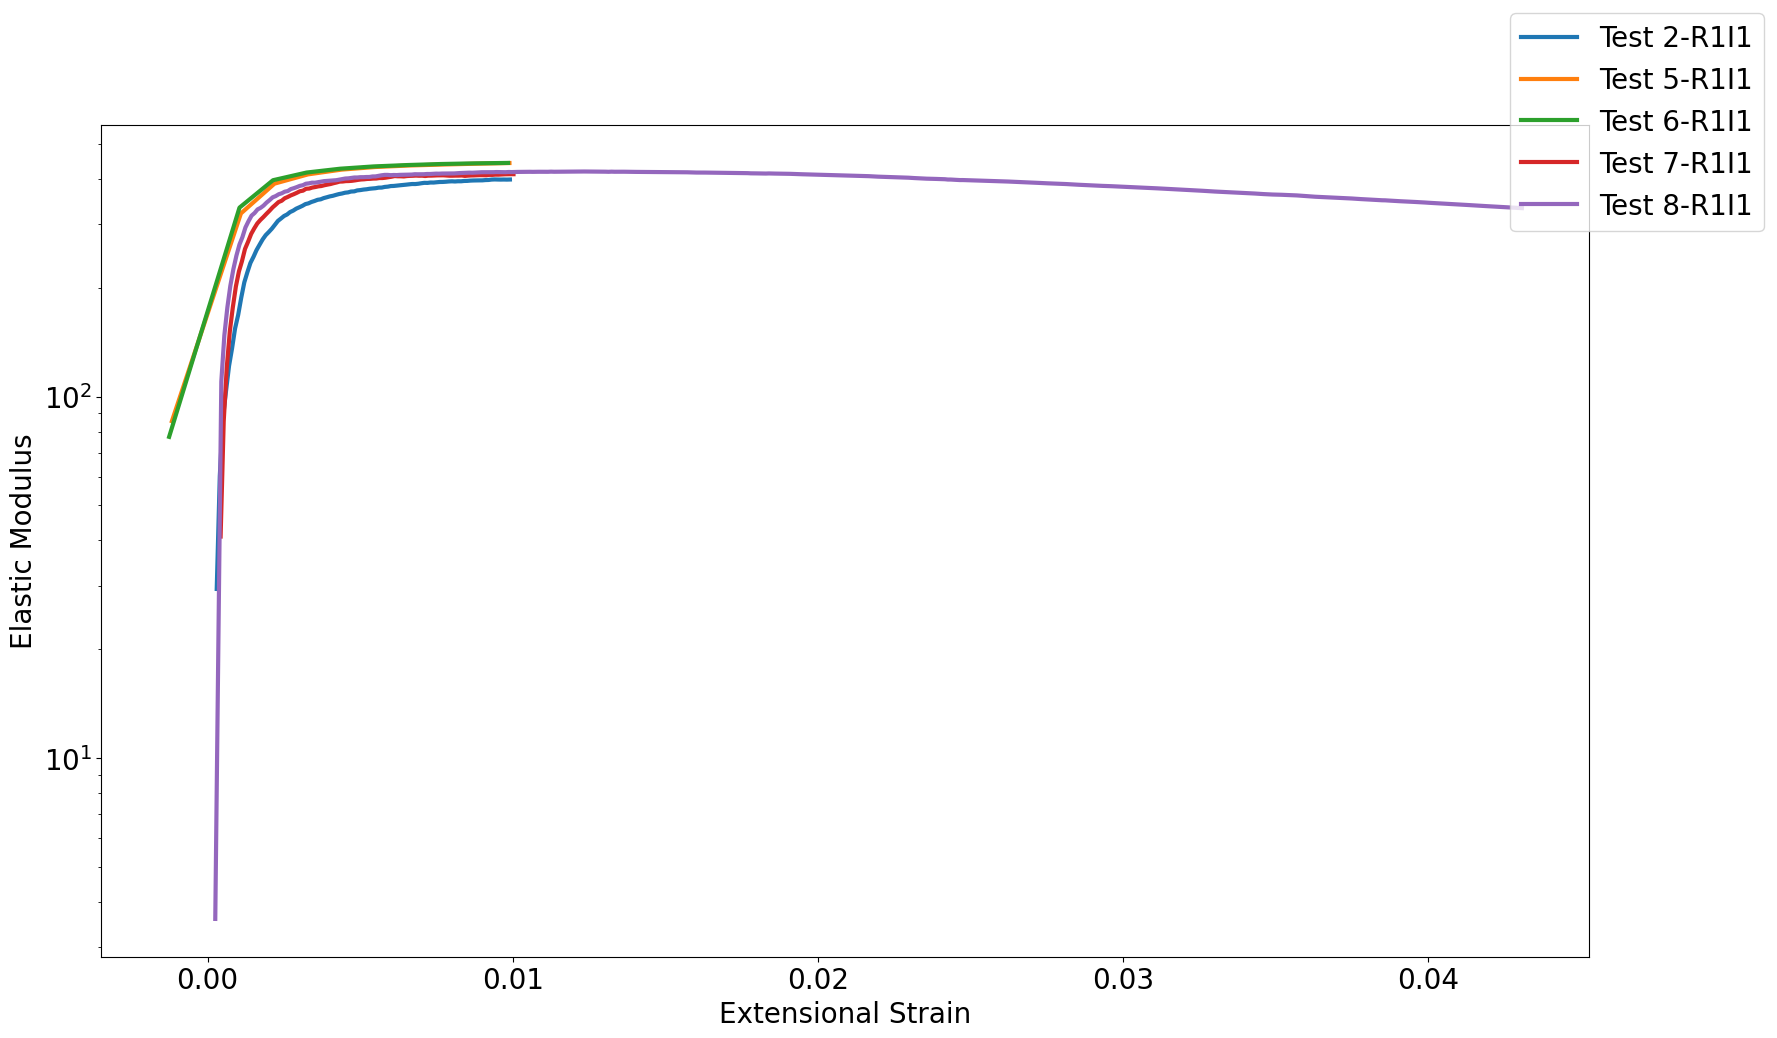

In [24]:
# # Plot multiple tests at the same time
tests = ['Test 2', 'Test 5', 'Test 6', 'Test 7', 'Test 8']
antonpaar_data.MultipleTestPlot(tests, 'Extensional Strain', 'Elastic Modulus')

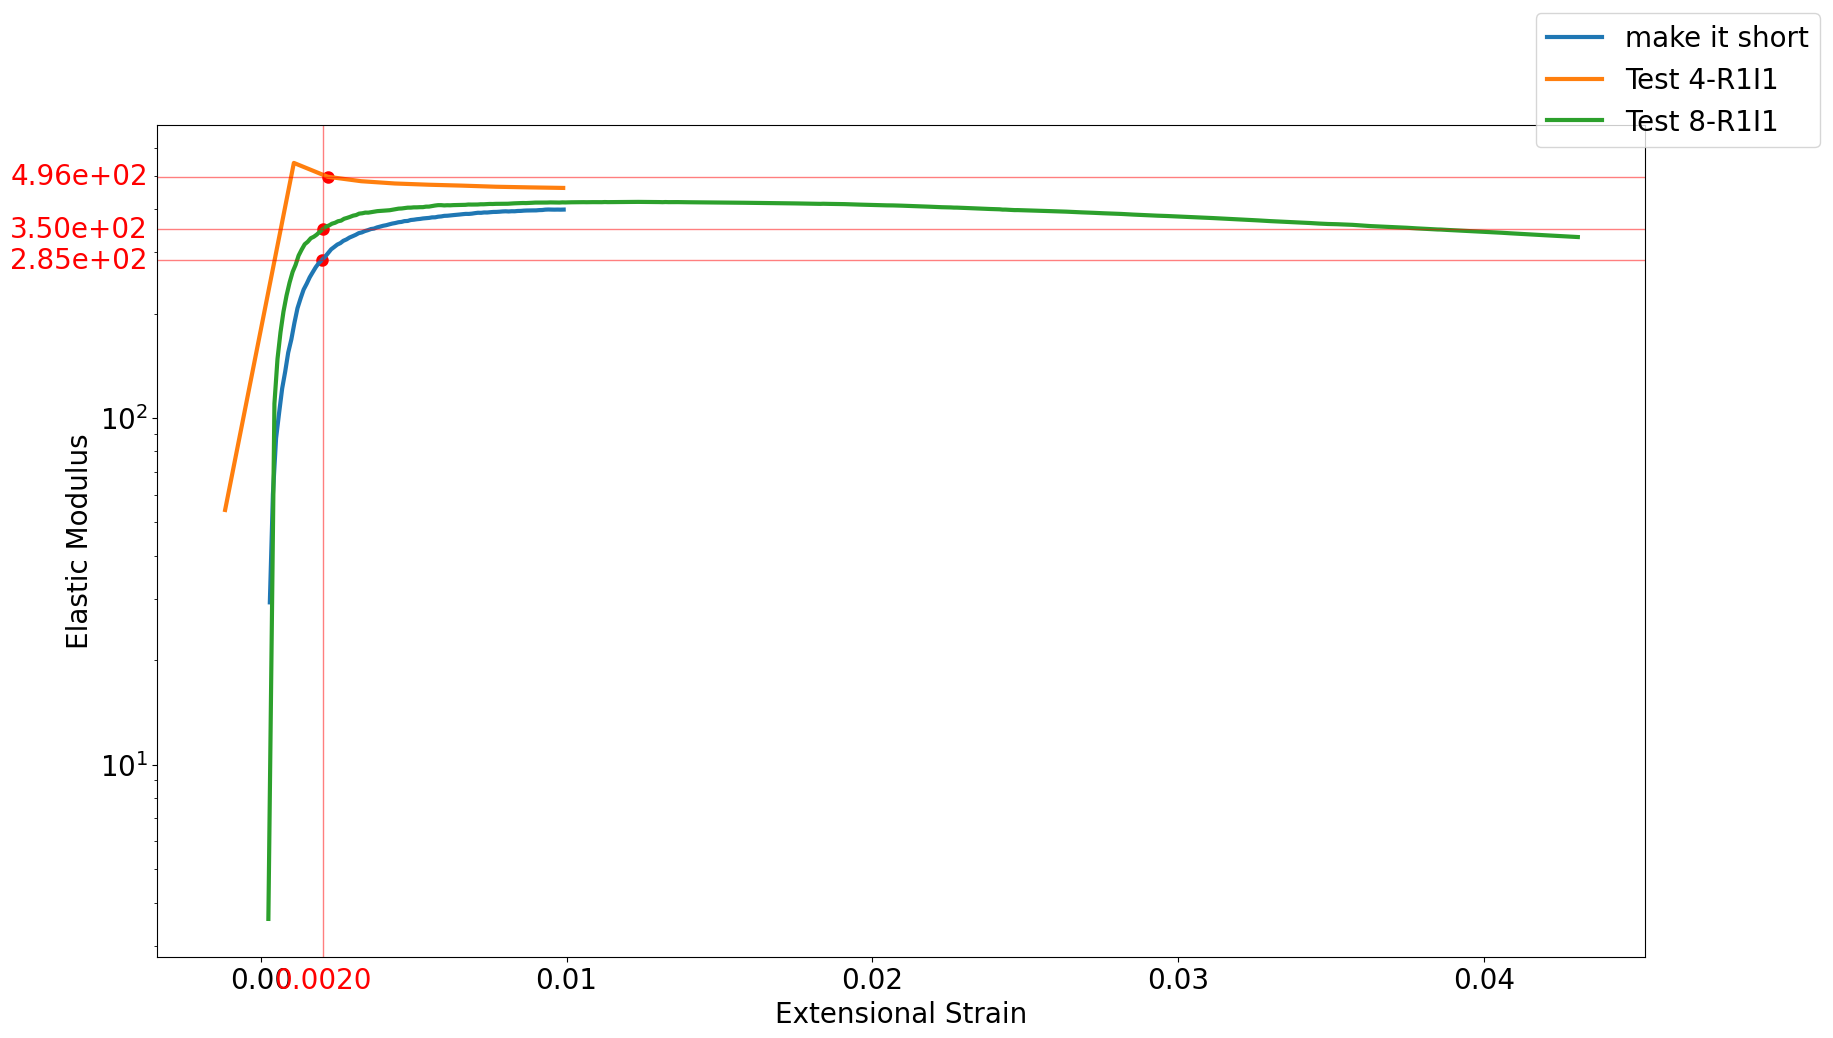

In [25]:
# # Work on the graph
tests = ['Test 2', 'Test 4', 'Test 8']
fig, ax, legend = antonpaar_data.MultipleTestPlot(tests, 'Extensional Strain', 'Elastic Modulus')
ax,_,_ = main.MarkSpot(ax, 2, x=0.002, horizontal=True, vertical=True, showNumbers=True)
ax,_,_ = main.MarkSpot(ax, 1, x=0.002, horizontal=True, vertical=False, showNumbers=True)
ax,_,_ = main.MarkSpot(ax, 0, x=0.002, horizontal=True, vertical=False, showNumbers=True)
# Edit legend
legend.get_texts()[0].set_text('make it short')

Text(0.5, 0.98, 'Strain Rate vs. Elastic Modulus')

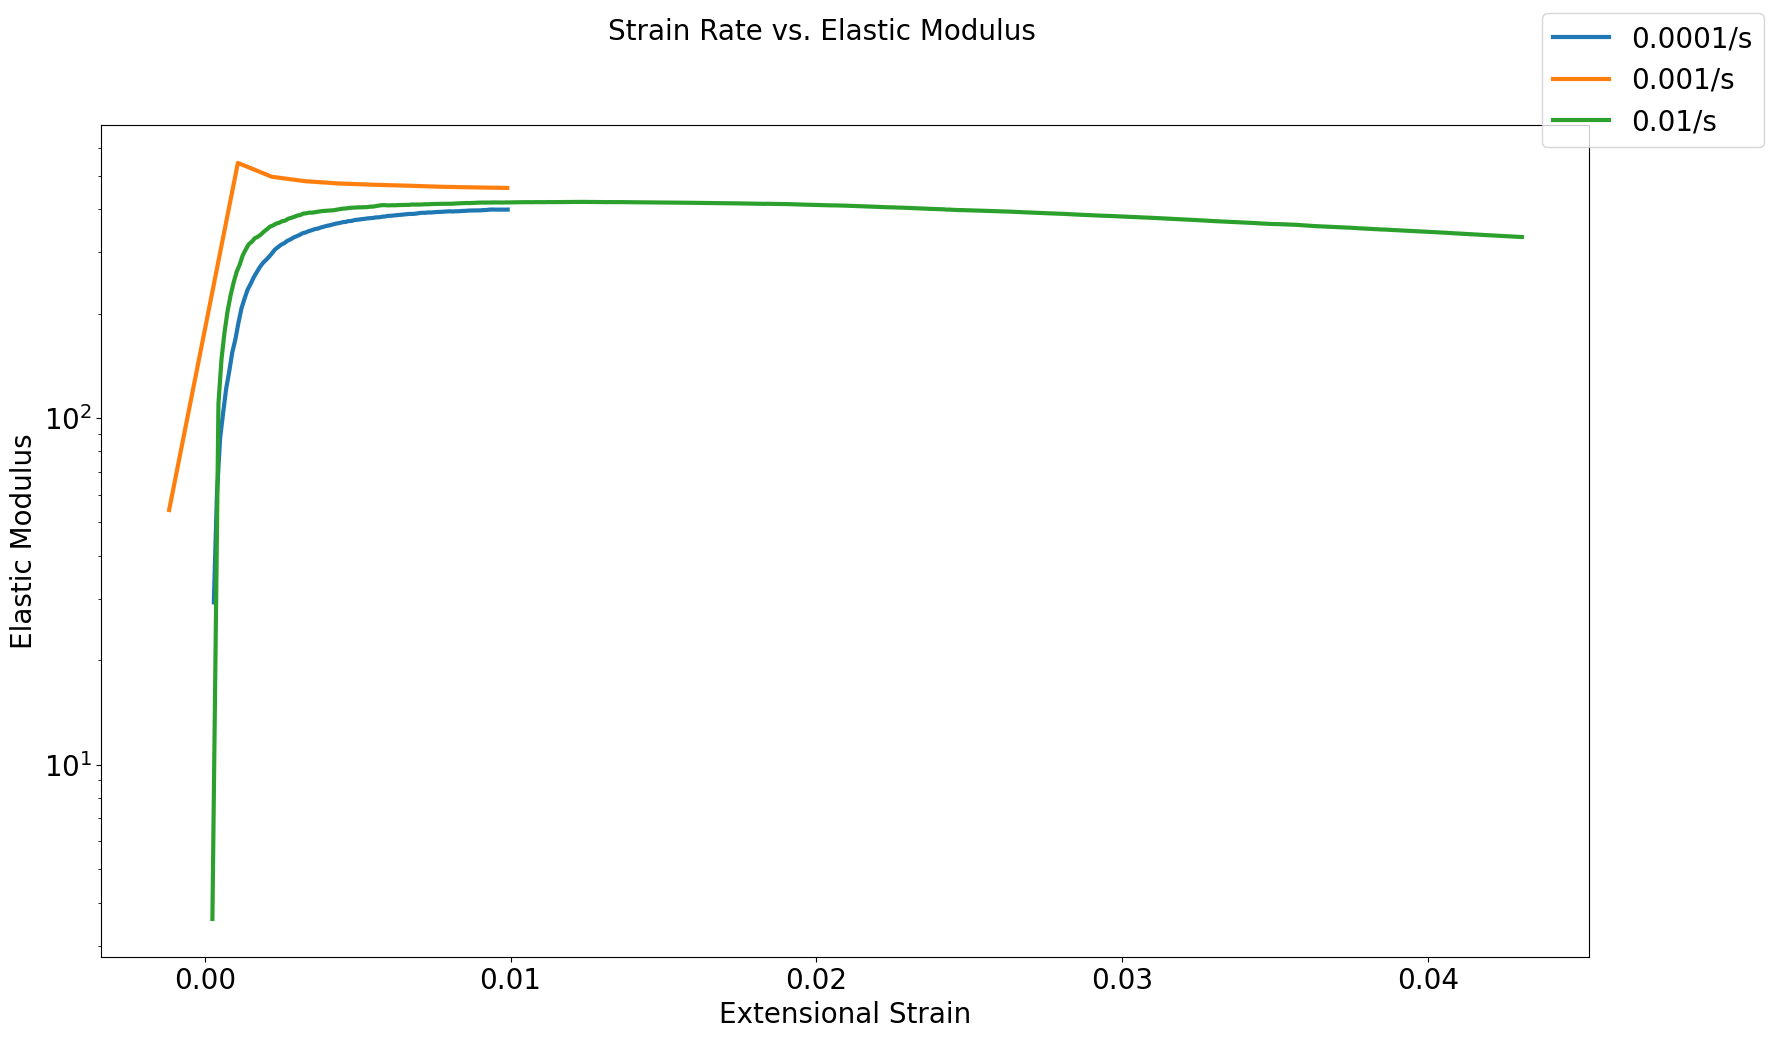

In [26]:
# # Create a new graph
tests = ['Test 2', 'Test 4', 'Test 8']
fig, ax, legend = antonpaar_data.MultipleTestPlot(tests, 'Extensional Strain', 'Elastic Modulus')
legend.remove()
ax.lines[0].set_color('tab:blue')
ax.lines[1].set_color('tab:orange')
ax.lines[2].set_color('tab:green')
fig.legend([ax.lines[0], ax.lines[1], ax.lines[2]], ['0.0001/s', '0.001/s', '0.01/s'], fontsize=20)
fig.suptitle('Strain Rate vs. Elastic Modulus', fontsize=20)

Text(0.5, 0, 'Extensional Strain (%)')

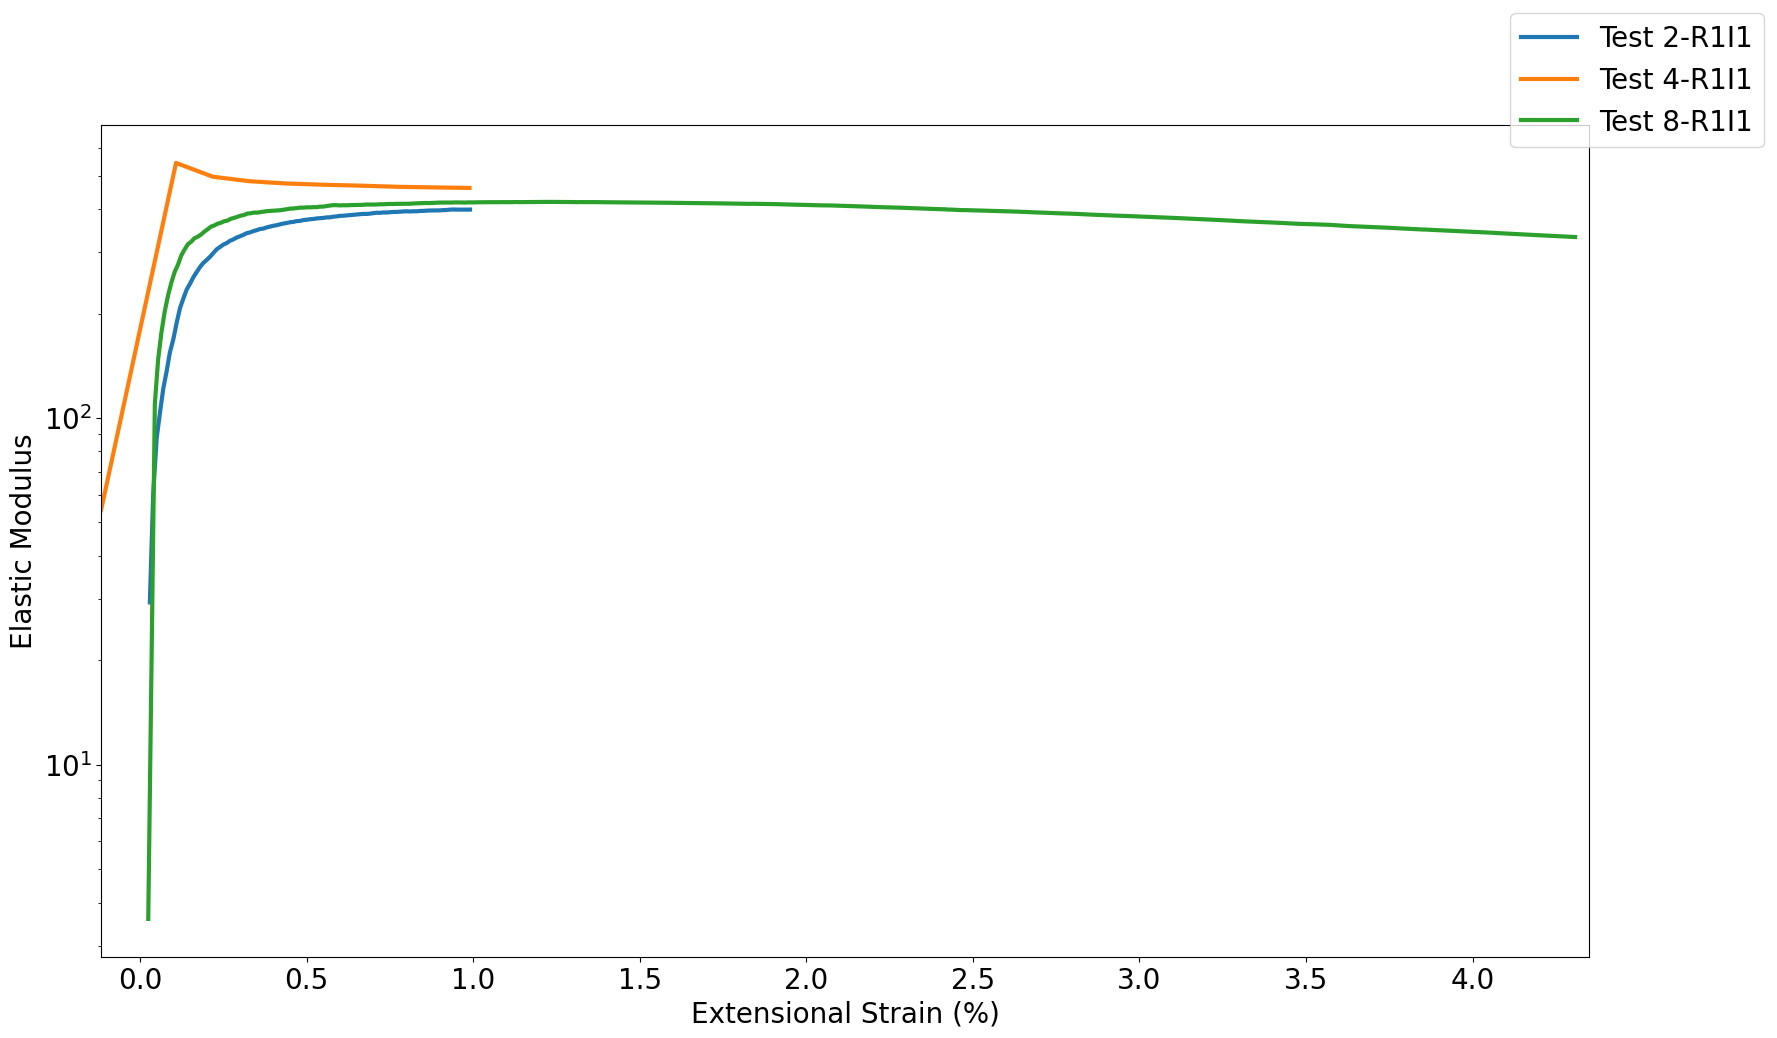

In [27]:
# # Change axis units (multiplying with 100)
tests = ['Test 2', 'Test 4', 'Test 8']
fig, ax, legend = antonpaar_data.MultipleTestPlot(tests, 'Extensional Strain', 'Elastic Modulus')
ax = main.ChangeAxUnits(ax, 'x', 100)
ax.set_xlabel('Extensional Strain (%)')

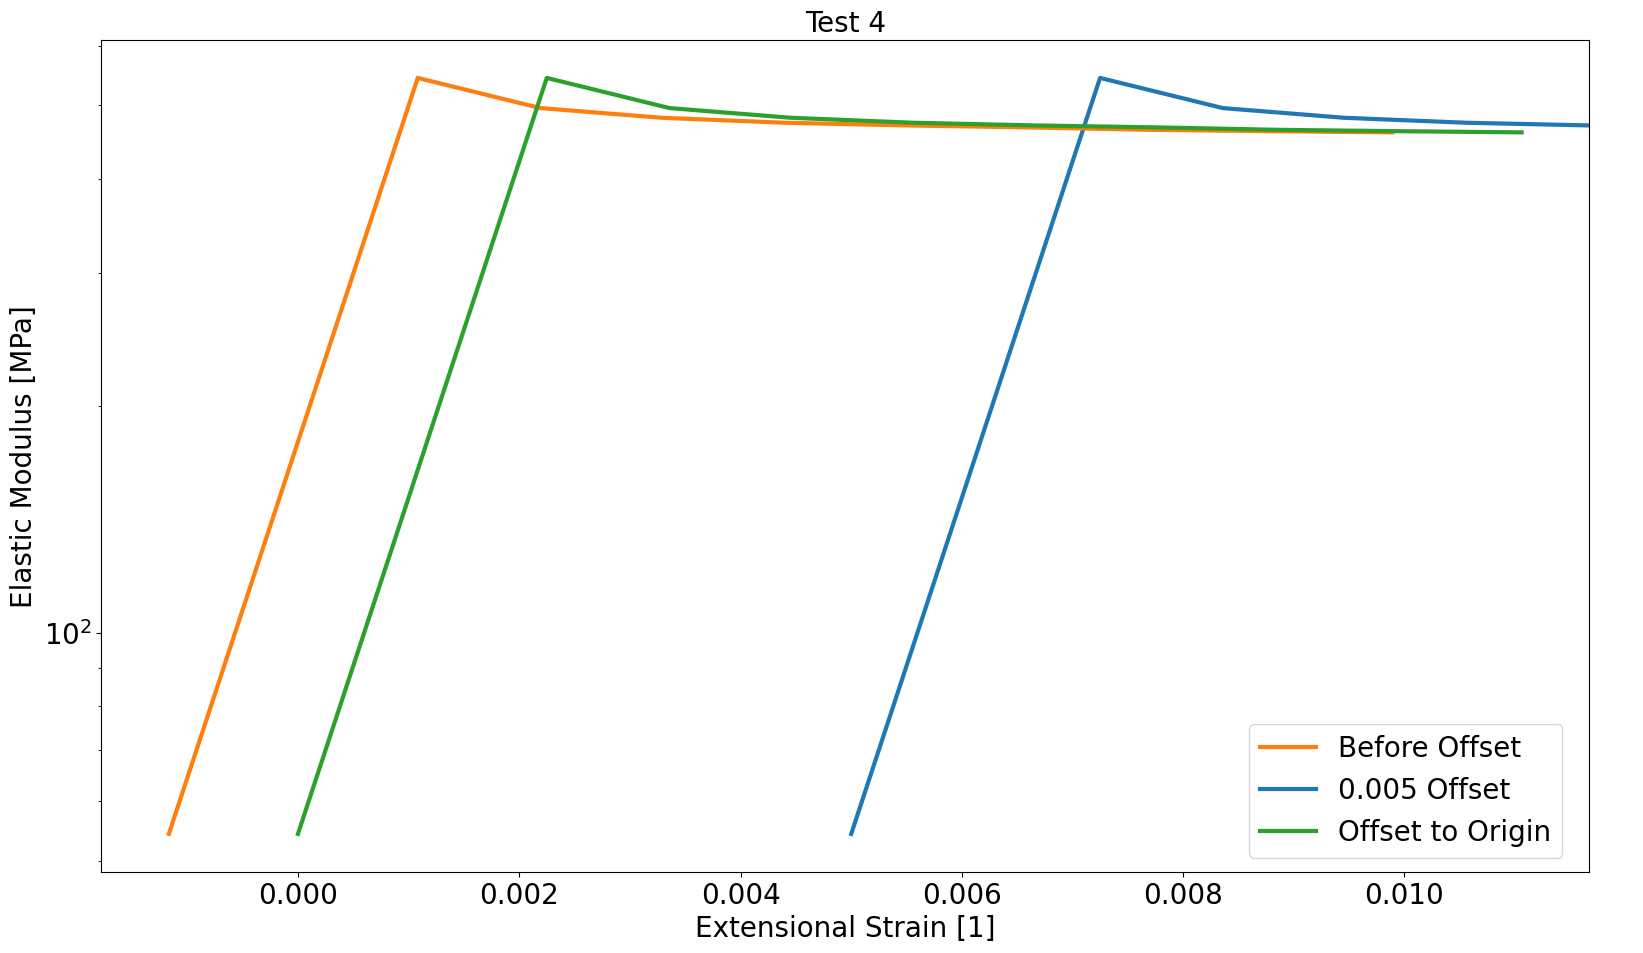

In [17]:
# # Correct initial strain reading (or other fast offsetting purposes)
test4 = antonpaar_data.CallTestbyName('Test 4')
fig, ax = test4.FastPlot('Extensional Strain', 'Elastic Modulus')
old_x = ax.lines[0].get_xdata()

# Here
ax,_ = main.OffsetData(ax, 0, 'x', first_el=True)
# Here

second_old_x = ax.lines[0].get_xdata()

# Here
ax = main.OffsetData(ax, 0, 'x', val=0.005)
# Here

ax.plot(old_x, ax.lines[0].get_ydata(), linewidth=3)
ax.plot(second_old_x, ax.lines[0].get_ydata(), linewidth=3)
fig.legend([ax.lines[1], ax.lines[0], ax.lines[2]],
            ['Before Offset', '0.005 Offset', 'Offset to Origin'], fontsize=20, loc=(0.76,0.1))